Notebook that looks at how persistent the effect of the surprises are

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
import statsmodels.api as sm
import os
directory = 'C:/Users/tmund/Documents/Submissions/HigherMomentsRep/'
os.chdir(directory)

In [2]:
mypath = 'DataVis/Persistence/Figs/'

In [20]:
m12df = pd.read_pickle('Data/Pickled/m12df.pkl')
m12df_purged = pd.read_pickle('Output/2 - PurgedFinancial/m12df_chg_purged.pkl')

In [24]:
df = pd.concat([m12df, m12df_purged.loc[:, ['StDevresid', 'Skewresid']]], axis=1)
df.loc[:, 'StDev_chg'] = df.loc[:, 'StDev']-df.loc[:, 'StDev'].shift(1)
df.loc[:, 'Skew_chg'] = df.loc[:, 'Skew']-df.loc[:, 'Skew'].shift(1)

In [21]:
m12df_purged.head()

,Meanresid,StDevresid,Medianresid,Skewresid,Kurtosisresid,LogMeanresid,LogStDevresid,LogSkewresid,LogKurtosisresid,cp5resid,cp15resid,cp25resid,cp35resid,cp45resid,cp55resid,cp65resid,cp75resid,cp85resid,cp95resid,ImpVolresid
DateTime,,,,,,,,,,,,,,,,,,,,
1998-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-13,0.131253,-0.007541,0.142291,-0.093356,-0.218631,-2.429657e-07,-0.000063,0.093119,-0.226020,0.121212,0.136822,0.140537,0.140967,0.141958,0.141813,0.137089,0.128174,0.122301,0.105455,-2.985475
1998-08-13,0.007903,0.024438,0.012820,-0.054125,-0.059257,-1.078281e-06,0.000252,0.053507,-0.061517,-0.043804,-0.023443,-0.009454,0.001876,0.009632,0.016393,0.024866,0.033115,0.036834,0.036374,1.892230
1998-11-11,0.169322,0.045257,0.156264,0.029504,0.091817,-6.441810e-06,0.000504,-0.032930,0.099304,0.104792,0.139662,0.153463,0.155514,0.155074,0.158346,0.165018,0.177452,0.204526,0.274768,0.257518
1999-02-10,-0.036586,-0.006809,-0.033169,-0.021218,-0.006050,1.860247e-07,-0.000076,0.021321,-0.008166,-0.035934,-0.029620,-0.027546,-0.028197,-0.031357,-0.034912,-0.036981,-0.038183,-0.043015,-0.056597,0.281030


In [31]:
# Regressions of
    # MarketMoment_{t+s}  = const + beta_1 * MarketMoment_{t-1} + beta_2 * shock_{t}

leadno = 30

coeff_stdev_array = np.zeros(leadno)
t_stdev_array = np.zeros(leadno)
stderr_stdev_array = np.zeros(leadno)
coeff_skew_array = np.zeros(leadno)
t_skew_array = np.zeros(leadno)
stderr_skew_array = np.zeros(leadno)

# stdev
for i in range(leadno):
    X = df.loc[:, 'StDevresid'].copy()
    X = sm.add_constant(X, prepend=True)
    y = df.loc[:, 'StDev'].copy().shift(-i)
    X['lag'] = df.loc[:, 'StDev'].copy().shift(1)
    model = sm.OLS(y, X, missing='drop')
    res = model.fit()
    coeff_stdev_array[i] = res.params[1]
    t_stdev_array[i] = res.tvalues[1]
    stderr_stdev_array[i] = res.bse[1]
    

# skew   
for i in range(leadno):
    X = df.loc[:, 'Skewresid'].copy()
    X = sm.add_constant(X, prepend=True)
    y = df.loc[:, 'Skew'].copy().shift(-i)
    X['lag'] = df.loc[:, 'Skew'].copy().shift(1)
    model = sm.OLS(y, X, missing='drop')
    res = model.fit()
    coeff_skew_array[i] = res.params[1]
    t_skew_array[i] = res.tvalues[1]
    stderr_skew_array[i] = res.bse[1]

In [28]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Skew   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 2.141e+04
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:08:22   Log-Likelihood:                -228.36
No. Observations:                4930   AIC:                             462.7
Df Residuals:                    4927   BIC:                             482.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0359      0.005      7.241      0.000       0.026       0.046
Skew_chg       0.9116      0.066     13.737      0.000       0.781       1.042
lag            0.9496      0.005    206.842      0.000       0.941       0.959
==============================================================================
Omnibus:                      875.333   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8837.445
Skew:                           0.544   Prob(JB):                         0.00
Kurtosis:                       9.468   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Find when t-values go below 5 and 10 percent levels
# stdev
print(np.where(t_stdev_array<1.96)[0][0])
print(np.where(t_stdev_array<1.64)[0][0])
print(np.where(t_skew_array<1.96)[0][0])
print(np.where(t_skew_array<1.64)[0][0])

19


IndexError: index 0 is out of bounds for axis 0 with size 0

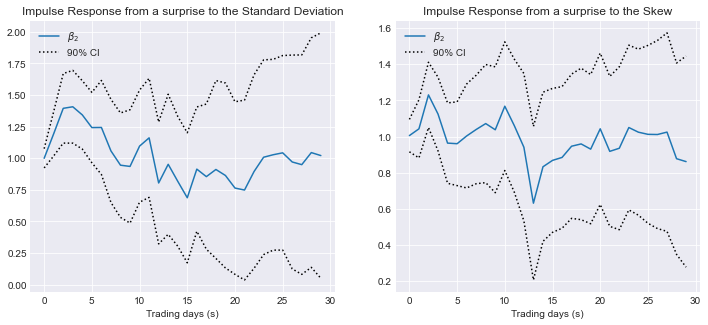

In [32]:
# Plot IRFs

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(leadno), coeff_stdev_array, label='$\\beta_2$')
plt.plot(np.arange(leadno), coeff_stdev_array+1.64*stderr_stdev_array, 'k:', label='90% CI')
plt.plot(np.arange(leadno), coeff_stdev_array-1.64*stderr_stdev_array, 'k:')
plt.title('Impulse Response from a surprise to the Standard Deviation')
plt.xlabel('Trading days (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(leadno), coeff_skew_array, label='$\\beta_2$')
plt.plot(np.arange(leadno), coeff_skew_array+1.64*stderr_skew_array, 'k:', label='90% CI')
plt.plot(np.arange(leadno), coeff_skew_array-1.64*stderr_skew_array, 'k:')
plt.xlabel('Trading days (s)')
plt.title('Impulse Response from a surprise to the Skew')
plt.legend()

plt.savefig(mypath+str('resid_irfs.pdf'))

plt.show()

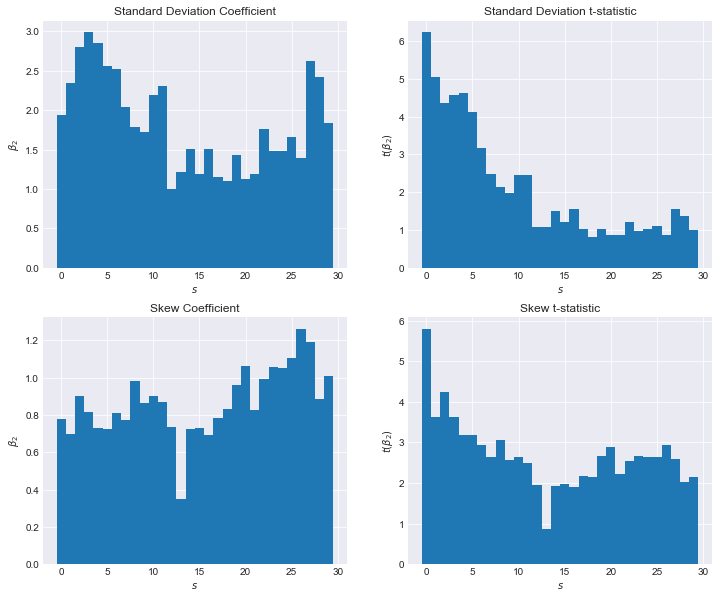

In [8]:
# Plot the relationships

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.bar(np.arange(leadno), coeff_stdev_array, width=1.)
plt.title('Standard Deviation Coefficient')
plt.ylabel('$\\beta_2$')
plt.xlabel('$s$')
plt.subplot(2, 2, 2)
plt.bar(np.arange(leadno), t_stdev_array, width=1.)
plt.title('Standard Deviation t-statistic')
plt.xlabel('$s$')
plt.ylabel('$t(\\beta_2)$')
plt.subplot(2, 2, 3)
plt.bar(np.arange(leadno), coeff_skew_array, width=1.)
plt.title('Skew Coefficient')
plt.xlabel('$s$')
plt.ylabel('$\\beta_2$')
plt.subplot(2, 2, 4)
plt.bar(np.arange(leadno), t_skew_array, width=1.)
plt.title('Skew t-statistic')
plt.xlabel('$s$')
plt.ylabel('$t(\\beta_2)$')
plt.savefig(mypath+str('reg1.pdf'))
plt.show()

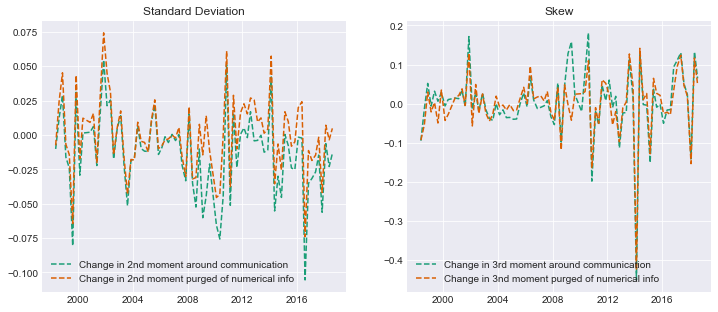

In [29]:
# Plots of shocks versus actual purged time series

#Create dataframe with no nas
stdevdf = df.loc[:, ['StDev_chg', 'StDevresid']].dropna()
skewdf = df.loc[:, ['Skew_chg', 'Skewresid']].dropna()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(stdevdf.loc[:, 'StDev_chg'],
         label='Change in 2nd moment around communication',
        color=palette(0),
        linestyle='--')
plt.plot(stdevdf.loc[:, 'StDevresid'], label='Change in 2nd moment purged of numerical info',
        color=palette(1),
        linestyle='--')
plt.legend()
plt.title('Standard Deviation')

plt.subplot(1, 2, 2)
plt.plot(skewdf.loc[:, 'Skew_chg'], label='Change in 3rd moment around communication',
        color=palette(0),
        linestyle='--')
plt.plot(skewdf.loc[:, 'Skewresid'], label='Change in 3nd moment purged of numerical info',
        color=palette(1),
        linestyle='--')
plt.legend()
plt.title('Skew')

plt.savefig(str(mypath)+'shocks.pdf')
plt.show()

